In [1]:
import os
import io
from zipfile import ZipFile
import pandas as pd
import tensorflow as tf
from PIL import Image
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import *
import os
import zipfile
from google.colab import drive
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/eyes_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#백내장 무 폴더 정리
img_dir0 = '/content/eyes_train/eye_train/0'
img0 = os.listdir(img_dir0)
image0 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img0))
label0 = list(filter(lambda x : x.find('.json')!=-1,img0))
image_0 = []
image_label0 = []
for i in image0:
    img = np.array(Image.open('/content/eyes_train/eye_train/0/{}'.format(i)))
    im0 = cv2.resize(img,(224,224))
    image_0.append(im0)
    image_label0.append(0)

In [5]:
#백내장 초기 폴더 정리
img_dir1 = '/content/eyes_train/eye_train/1'
img1 = os.listdir(img_dir1)
image1 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img1))
label1 = list(filter(lambda x : x.find('.json')!=-1,img1))
for i in image1:
    img = np.array(Image.open('/content/eyes_train/eye_train/1/{}'.format(i)))
    im1 = cv2.resize(img,(224,224))
    image_0.append(im1)
    image_label0.append(1)

In [6]:
#백내장 비성숙 폴더 정리
img_dir2 = '/content/eyes_train/eye_train/2'
img2 = os.listdir(img_dir2)
image2 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img2))
label2 = list(filter(lambda x : x.find('.json')!=-1,img2))
for i in image2:
    img = np.array(Image.open('/content/eyes_train/eye_train/2/{}'.format(i)))
    im2 = cv2.resize(img,(224,224))
    image_0.append(im2)
    image_label0.append(2)

In [7]:
#백내장 성숙 폴더 정리
img_dir3 = '/content/eyes_train/eye_train/3'
img3 = os.listdir(img_dir3)
image3 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img3))
label3 = list(filter(lambda x : x.find('.json')!=-1,img3))
for i in image3:
    img = np.array(Image.open('/content/eyes_train/eye_train/3/{}'.format(i)))
    im3 = cv2.resize(img,(224,224))
    image_0.append(im3)
    image_label0.append(3)

In [8]:
x = np.array(image_0)
y = np.array(image_label0)

In [9]:
#원핫 인코딩
y = np_utils.to_categorical(y)

In [10]:
#데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, shuffle =True, test_size = 0.2, random_state = 123)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.nn import silu
#EfficientNetB4불러오기
Eff = EfficientNetB4(weights = 'imagenet', input_shape = (224,224,3), include_top = False, pooling='avg')

71686520/71686520 [==============================] - 3s 0us/step


In [12]:
rmsprop = RMSprop(
    learning_rate=0.001,
)

In [13]:
Eff.summary()

Model: "efficientnetb4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0

In [14]:
model = Sequential()
#분류기 직접 정리
model.add(Eff)
model.add(Dense(1024))
model.add(Activation('silu'))
model.add(Dense(4,activation = 'softmax'))
model.compile(optimizer=rmsprop, # 옵티마이저 : rmsprop
              loss = 'categorical_crossentropy', # 손실 함수 : sparse_categorical_crossentropy
              metrics = ['accuracy']) # 모니터링 할 평가지표 : 
history = model.fit(x_train, y_train, 
                      epochs = 10, 
                      batch_size = 32, 
                      validation_data = (x_val, y_val))

Epoch 1/10
688/688 [==============================] - 563s 767ms/step - loss: 0.6720 - accuracy: 0.7107 - val_loss: 0.6319 - val_accuracy: 0.7366
Epoch 2/10
688/688 [==============================] - 525s 763ms/step - loss: 0.4947 - accuracy: 0.7928 - val_loss: 0.4666 - val_accuracy: 0.8165
Epoch 3/10
688/688 [==============================] - 525s 764ms/step - loss: 0.3765 - accuracy: 0.8504 - val_loss: 0.6422 - val_accuracy: 0.8032
Epoch 4/10
688/688 [==============================] - 525s 763ms/step - loss: 0.2866 - accuracy: 0.8898 - val_loss: 0.7486 - val_accuracy: 0.7609
Epoch 5/10
688/688 [==============================] - 525s 763ms/step - loss: 0.2189 - accuracy: 0.9178 - val_loss: 0.5132 - val_accuracy: 0.8343
Epoch 6/10
688/688 [==============================] - 526s 764ms/step - loss: 0.1641 - accuracy: 0.9416 - val_loss: 0.5588 - val_accuracy: 0.8339
Epoch 7/10
688/688 [==============================] - 524s 762ms/step - loss: 0.1343 - accuracy: 0.9522 - val_loss: 0.5249 -

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense (Dense)               (None, 1024)              1836032   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 19,513,955
Trainable params: 19,388,748
Non-trainable params: 125,207
_________________________________________________________________


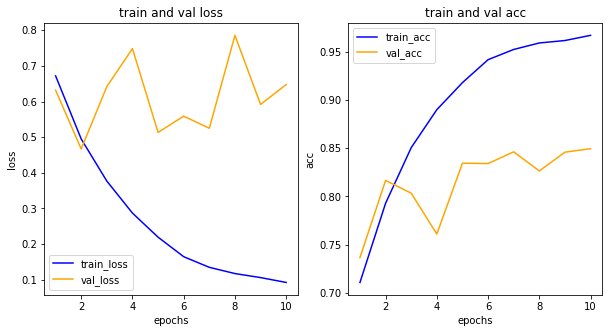

In [16]:
# 정확도와 로스 그래프
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense (Dense)               (None, 1024)              1836032   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 19,513,955
Trainable params: 19,388,748
Non-trainable params: 125,207
_________________________________________________________________


In [18]:
# 6. 모델 저장하기
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/EfficientNetB4_6000_tune0.h5')

In [19]:
#정확도 f1
from sklearn.metrics import *
def get_clf_eval(y_test,pred): 
  f1 = f1_score(y_test,pred,average="macro") 
  acc = accuracy_score(y_val,predict)   
  loss = model.evaluate(x_val, y_val, batch_size=32)
  print('정확도 :',acc)
  print('f1 score:',f1)
  print('loss :',loss )

In [20]:
predcit = model.predict(x_val)
predict = []
for i in np.arange(len(predcit)):
  labels = np.argmax(predcit[i])
  predict.append(labels)
predict = np.array(predict)
predict = np_utils.to_categorical(predict)

172/172 [==============================] - 28s 147ms/step


In [21]:
#EfficientNetB4, Epoch10, imagenet
get_clf_eval(y_val,predict)

172/172 [==============================] - 25s 148ms/step - loss: 0.6476 - accuracy: 0.8494
정확도 : 0.8493822674418605
f1 score: 0.8477970842412336
loss : [0.6475804448127747, 0.8493822813034058]


In [22]:
# 백내장 예측 함수
def pred_label(pred):
  img = cv2.imread(pred, cv2.IMREAD_COLOR)
  im = cv2.resize(img,(296,296))
  pred_image = np.expand_dims(im, axis=0)
  predict = model.predict(pred_image)
  predict_image = np.argmax(predict)
  if predict_image == 0:
      print('백내장이 아닙니다.')
  elif predict_image == 1:
      print('백내장 초기단계입니다.')
  elif predict_image == 2:
      print('백내장 중간 단계입니다.')
  else:
      print('백내장 심해요') 